In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from datetime import datetime

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3790 entries, 907 to 8385
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3790 non-null   object 
 1   Location       3790 non-null   object 
 2   MinTemp        3790 non-null   float64
 3   MaxTemp        3790 non-null   float64
 4   Rainfall       3790 non-null   float64
 5   Evaporation    3790 non-null   float64
 6   Sunshine       3790 non-null   float64
 7   WindGustDir    3790 non-null   object 
 8   WindGustSpeed  3790 non-null   float64
 9   WindDir9am     3790 non-null   object 
 10  WindDir3pm     3790 non-null   object 
 11  WindSpeed9am   3790 non-null   float64
 12  WindSpeed3pm   3790 non-null   float64
 13  Humidity9am    3790 non-null   float64
 14  Humidity3pm    3790 non-null   float64
 15  Pressure9am    3790 non-null   float64
 16  Pressure3pm    3790 non-null   float64
 17  Cloud9am       3790 non-null   float64
 18  Cloud3

In [8]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3790.000000  3790.000000  3790.000000  3790.000000  3790.000000   
mean     14.071029    24.733483     2.451768     5.292533     7.852744   
std       5.161176     6.068364     7.772025     3.642341     3.816696   
min      -0.700000    10.800000     0.000000     0.000000     0.000000   
25%      10.200000    20.300000     0.000000     2.800000     5.200000   
50%      14.000000    24.100000     0.000000     4.600000     8.900000   
75%      17.900000    29.200000     0.800000     7.000000    10.800000   
max      28.500000    43.600000   168.400000    37.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    3790.000000   3790.000000   3790.000000  3790.000000  3790.000000   
mean       41.203958     16.377836     20.099208    63.683641    49.435620   
std        13.857829      9.516511      8.719867    16.273443    17.673797   
min        13.000000      2.000000      2.000000    11.000000     6.000000   
25%        31.000000      9.000000     13.000000    53.000000    38.000000   
50%        39.000000     15.000000     20.000000    64.000000    49.000000   
75%        50.000000     22.000000     26.000000    75.000000    61.000000   
max       102.000000     61.000000     52.000000    99.000000    98.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  3790.000000  3790.000000  3790.000000  3790.000000  3790.000000   
mean   1017.488047  1015.037836     4.116623     4.214776    18.963536   
std       6.560724     6.485755     2.773039     2.647355     5.528374   
min     992.900000   990.800000     0.000000     0.000000     4.500000   
25%    1013.100000  1010.400000     1.000000     1.000000    14.900000   
50%    1017.400000  1015.050000     5.000000     5.000000    18.700000   
75%    1021.700000  1019.300000     7.000000     7.000000    23.200000   
max    1039.000000  1035.600000     8.000000     8.000000    39.400000   

           Temp3pm  
count  3790.000000  
mean     23.226201  
std       5.929694  
min       9.400000  
25%      19.100000  
50%      22.700000  
75%      27.300000  
max      42.400000

In [9]:
df.head()

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
907  2009-03-10  CoffsHarbour     19.8     27.1      24.4          8.6   
908  2009-03-11  CoffsHarbour     18.7     25.6       6.8          3.8   
909  2009-03-12  CoffsHarbour     16.5     25.5      16.8          2.8   
910  2009-03-13  CoffsHarbour     18.5     26.9       0.0          3.2   
911  2009-03-14  CoffsHarbour     18.2     28.2       0.0          6.8   

     Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
907       9.0         ESE           35.0         SW  ...        83.0   
908       3.4           E           33.0         SW  ...        85.0   
909       6.1         WSW           19.0        WSW  ...        84.0   
910      11.0         ENE           30.0         SW  ...        68.0   
911       9.0         NNE           50.0        NNW  ...        67.0   

     Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
907         60.0       1018.9       1017.9       6.0       6.0     22.0   
908         90.0       1020.7       1020.1       4.0       7.0     21.0   
909         65.0       1021.5       1020.1       5.0       7.0     21.0   
910         60.0       1018.9       1016.6       2.0       5.0     23.3   
911         68.0       1016.3       1012.8       1.0       1.0     24.0   

     Temp3pm  RainToday  RainTomorrow  
907     26.0        Yes           Yes  
908     20.9        Yes           Yes  
909     24.5        Yes            No  
910     26.4         No            No  
911     25.9         No           Yes  

[5 rows x 23 columns]

In [10]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [11]:
df.shape

(3790, 23)

Data Visualization

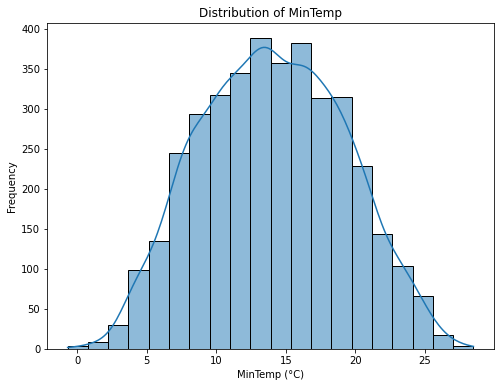

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['MinTemp'], bins=20, kde=True)
plt.title('Distribution of MinTemp')
plt.xlabel('MinTemp (°C)')
plt.ylabel('Frequency')
plt.show()

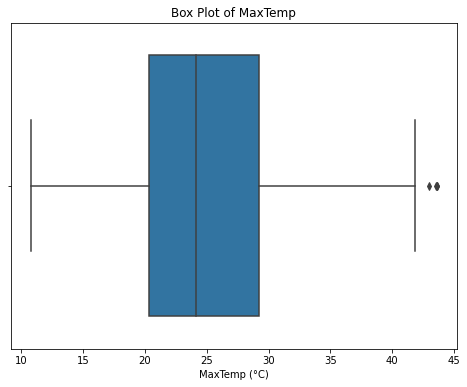

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='MaxTemp', data=df)
plt.title('Box Plot of MaxTemp')
plt.xlabel('MaxTemp (°C)')
plt.show()

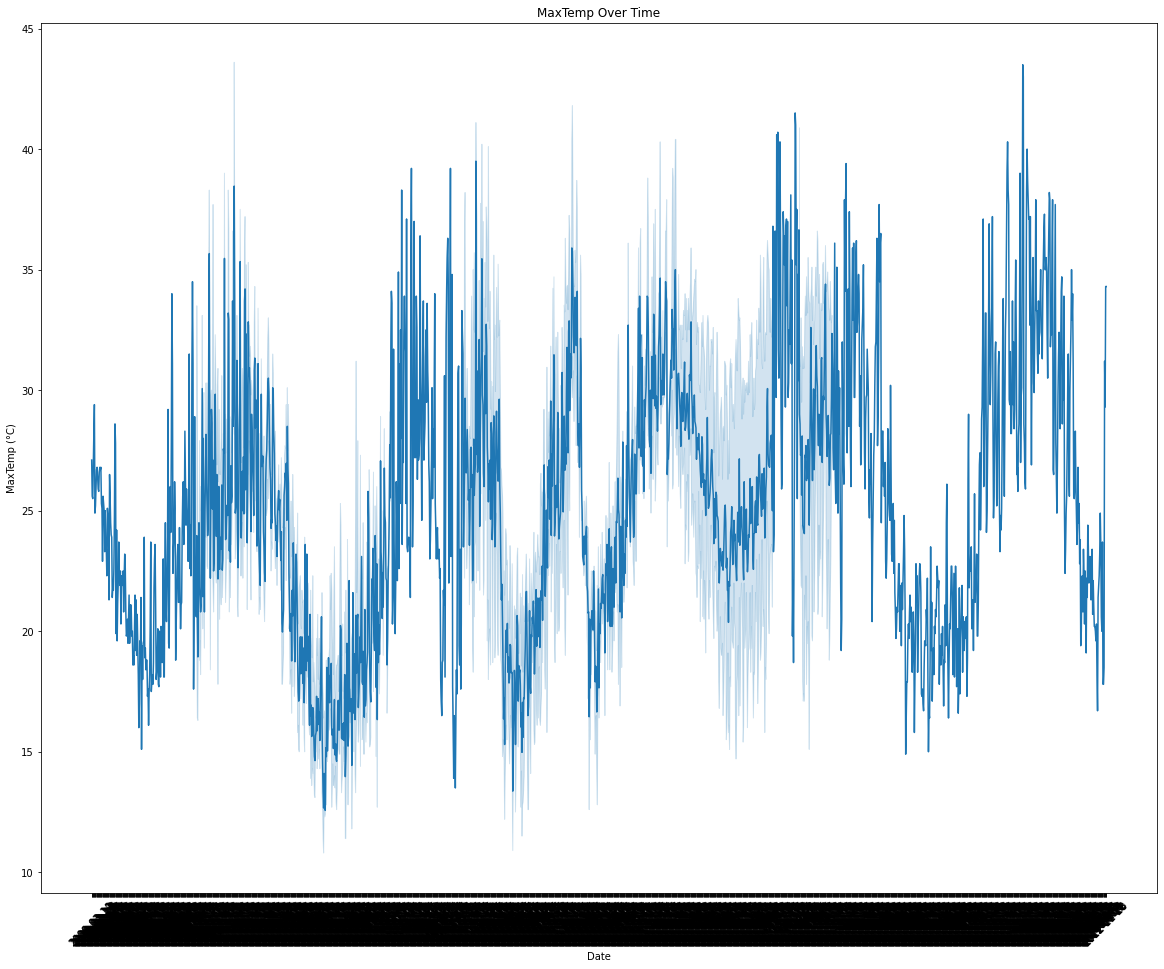

In [14]:
plt.figure(figsize=(20, 16))
sns.lineplot(x='Date', y='MaxTemp', data=df)
plt.title('MaxTemp Over Time')
plt.xlabel('Date')
plt.ylabel('MaxTemp (°C)')
plt.xticks(rotation=45)
plt.show()

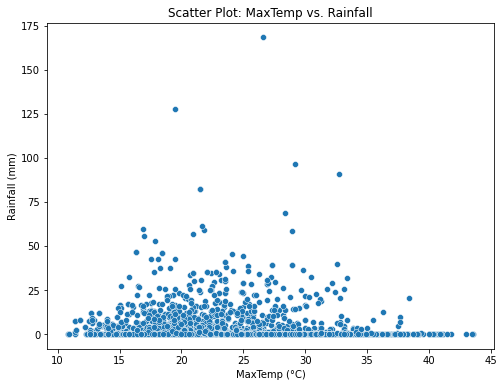

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MaxTemp', y='Rainfall', data=df)
plt.title('Scatter Plot: MaxTemp vs. Rainfall')
plt.xlabel('MaxTemp (°C)')
plt.ylabel('Rainfall (mm)')
plt.show()

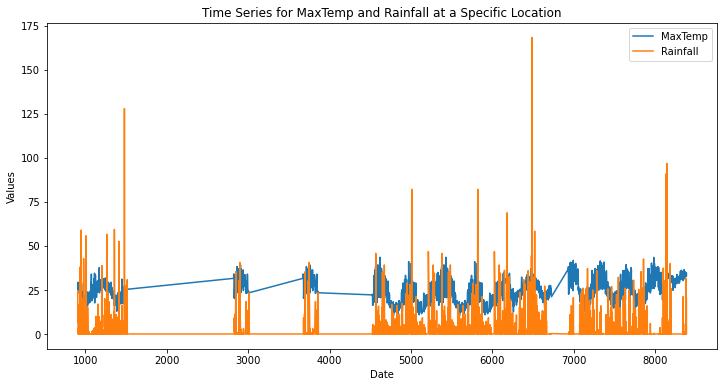

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MaxTemp'], label='MaxTemp')
plt.plot(df.index, df['Rainfall'], label='Rainfall')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series for MaxTemp and Rainfall at a Specific Location')
plt.legend()
plt.show()

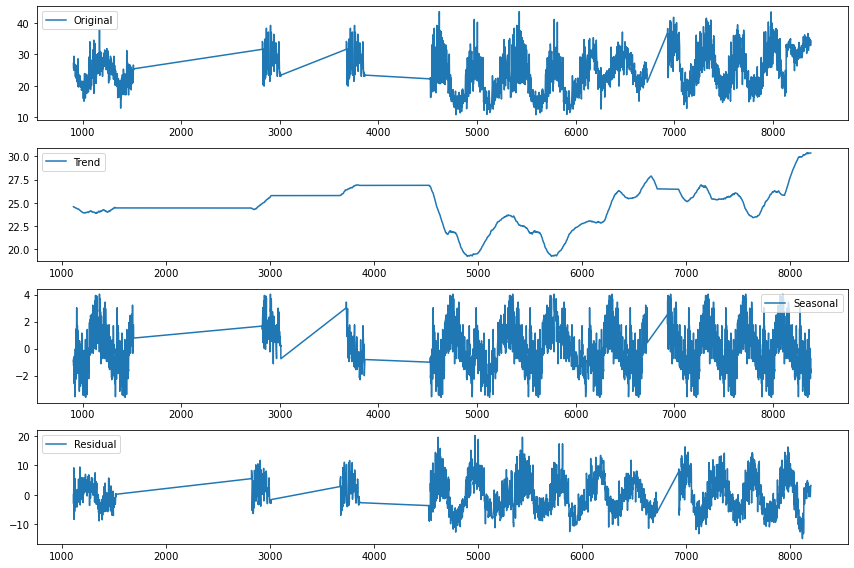

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['MaxTemp'], model='additive', freq=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df.index, df['MaxTemp'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(df.index, trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(df.index, residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

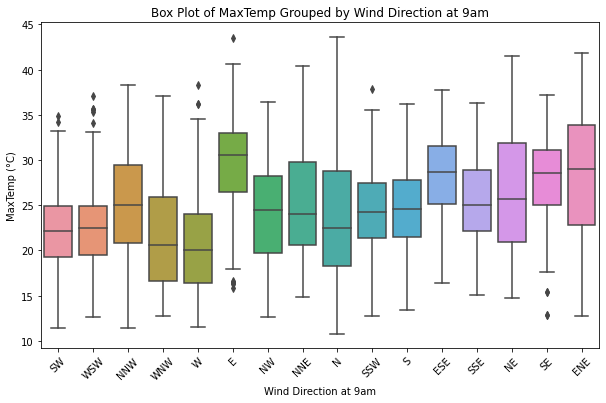

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='WindDir9am', y='MaxTemp', data=df)
plt.title('Box Plot of MaxTemp Grouped by Wind Direction at 9am')
plt.xlabel('Wind Direction at 9am')
plt.ylabel('MaxTemp (°C)')
plt.xticks(rotation=45)
plt.show()

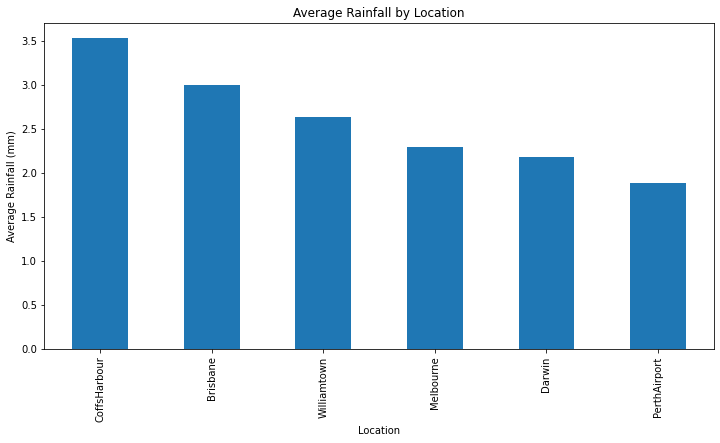

In [19]:
avg_rainfall_by_location = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_rainfall_by_location.plot(kind='bar')
plt.title('Average Rainfall by Location')
plt.xlabel('Location')
plt.ylabel('Average Rainfall (mm)')
plt.xticks(rotation=90)
plt.show()

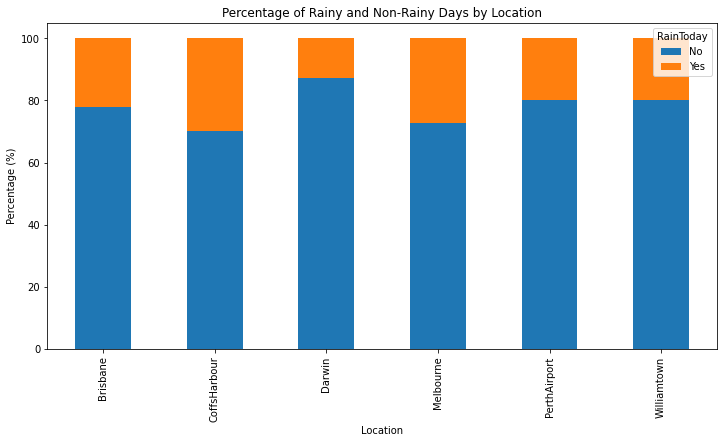

In [20]:
rain_counts = df.groupby(['Location', 'RainToday'])['Date'].count().unstack(fill_value=0)


rain_counts_percent = rain_counts.div(rain_counts.sum(axis=1), axis=0) * 100


rain_counts_percent.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage of Rainy and Non-Rainy Days by Location')
plt.xlabel('Location')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.legend(title='RainToday', loc='upper right', labels=['No', 'Yes'])
plt.show()

Bivariate analysis

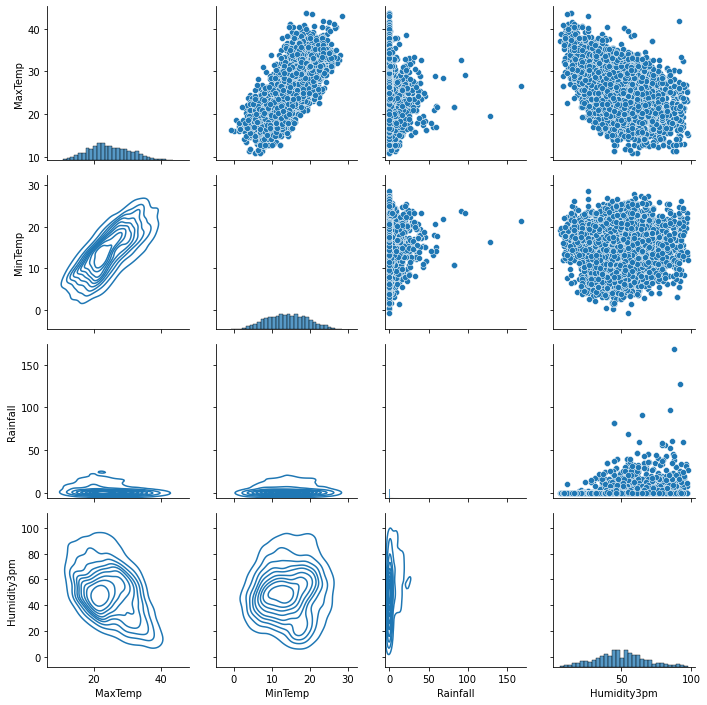

In [21]:
g = sns.PairGrid(df[['MaxTemp', 'MinTemp', 'Rainfall', 'Humidity3pm']])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
plt.show()

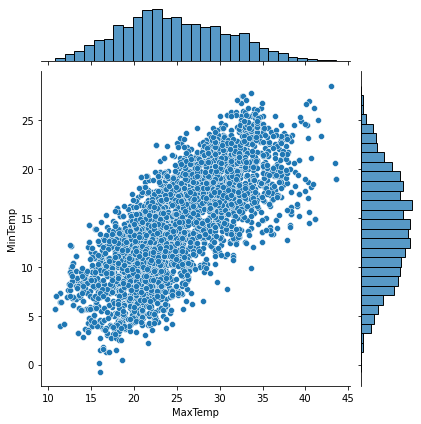

In [22]:
sns.jointplot(x='MaxTemp', y='MinTemp', data=df, kind='scatter')
plt.show()

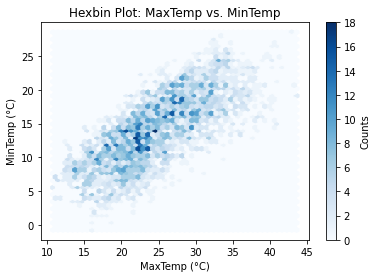

In [23]:
plt.hexbin(df['MaxTemp'], df['MinTemp'], gridsize=50, cmap='Blues')
plt.colorbar(label='Counts')
plt.xlabel('MaxTemp (°C)')
plt.ylabel('MinTemp (°C)')
plt.title('Hexbin Plot: MaxTemp vs. MinTemp')
plt.show()

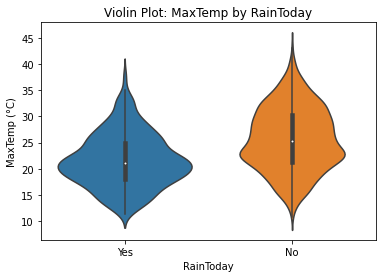

In [24]:
sns.violinplot(x='RainToday', y='MaxTemp', data=df)
plt.title('Violin Plot: MaxTemp by RainToday')
plt.xlabel('RainToday')
plt.ylabel('MaxTemp (°C)')
plt.show()

In [25]:
#evaluate the target and find out if our data is imbalanced or not
class_distribution = df['RainTomorrow'].value_counts()
print(class_distribution)

No     2901
Yes     889
Name: RainTomorrow, dtype: int64


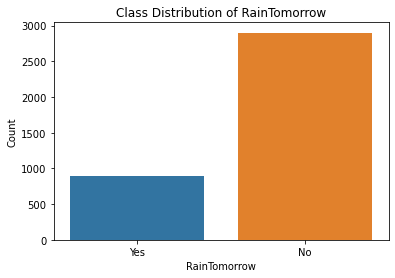

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Class Distribution of RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.show()

In [27]:
positive_class_count = class_distribution['Yes'] 
negative_class_count = class_distribution['No']  
imbalance_ratio = positive_class_count / negative_class_count
print(f'Imbalance Ratio: {imbalance_ratio:.2f}')

Imbalance Ratio: 0.31


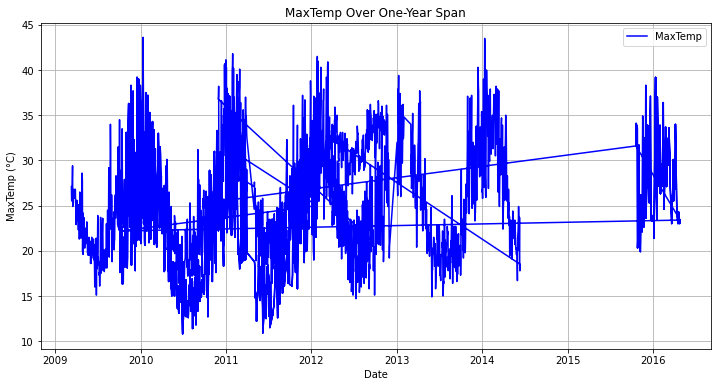

In [28]:
df['Date'] = pd.to_datetime(df['Date'])


start_date = '2008-12-01'
end_date = '2017-06-25'


filtered_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['MaxTemp'], label='MaxTemp', color='blue')
plt.title('MaxTemp Over One-Year Span')
plt.xlabel('Date')
plt.ylabel('MaxTemp (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
wind_directions = ['N', 'NW', 'W', 'SW', 'S', 'SE', 'E', 'NE']


direction_to_degree = {
    'N': 0,
    'NW': 45,
    'W': 90,
    'SW': 135,
    'S': 180,
    'SE': 225,
    'E': 270,
    'NE': 315
}


encoded_wind_directions = []
for direction in wind_directions:
    degree = direction_to_degree[direction]
    radian = np.radians(degree)
    encoded_wind_directions.append((np.sin(radian), np.cos(radian)))


for direction, (sin_value, cos_value) in zip(wind_directions, encoded_wind_directions):
    print(f'{direction}: Sin={sin_value:.2f}, Cos={cos_value:.2f}')

N: Sin=0.00, Cos=1.00
NW: Sin=0.71, Cos=0.71
W: Sin=1.00, Cos=0.00
SW: Sin=0.71, Cos=-0.71
S: Sin=0.00, Cos=-1.00
SE: Sin=-0.71, Cos=-0.71
E: Sin=-1.00, Cos=-0.00
NE: Sin=-0.71, Cos=0.71


In [30]:
import plotly.express as px
selected_locations = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']

filtered_data = df[df['Location'].isin(selected_locations)]


for location in selected_locations:
    location_data = filtered_data[filtered_data['Location'] == location]
    
    fig = px.scatter(
        location_data,
        x='MaxTemp',
        y='MinTemp',
        title=f'Scatter Plot: MaxTemp vs. MinTemp for {location}',
        labels={'MaxTemp': 'MaxTemp (°C)', 'MinTemp': 'MinTemp (°C)'},
        template='plotly_white'
    )
    

    fig.show()

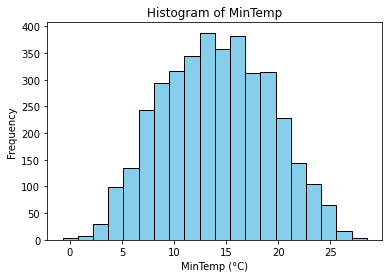

In [31]:
plt.hist(df['MinTemp'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('MinTemp (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of MinTemp')
plt.show()

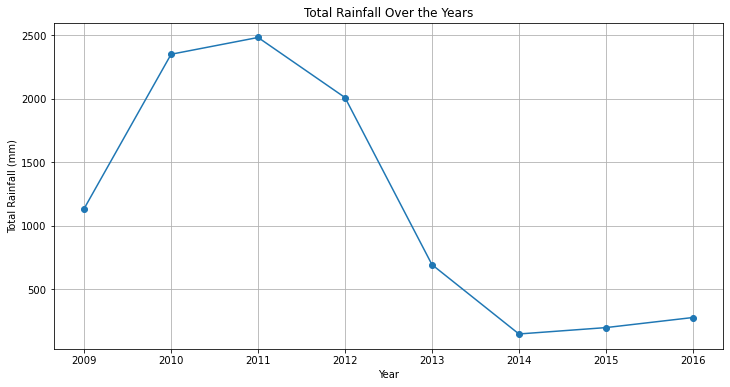

In [32]:
rainfall_by_year = df.groupby(df['Date'].dt.year)['Rainfall'].sum()

plt.figure(figsize=(12, 6))
plt.plot(rainfall_by_year.index, rainfall_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.title('Total Rainfall Over the Years')
plt.grid(True)
plt.show()

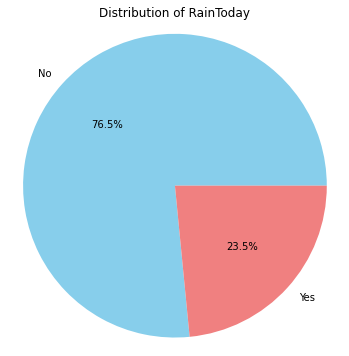

In [33]:
rain_today_counts = df['RainToday'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(rain_today_counts, labels=rain_today_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of RainToday')
plt.axis('equal') 

plt.show()

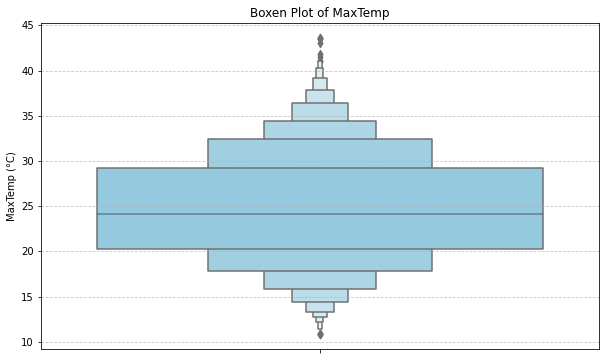

In [34]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, y='MaxTemp', color='skyblue')
plt.ylabel('MaxTemp (°C)')
plt.title('Boxen Plot of MaxTemp')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

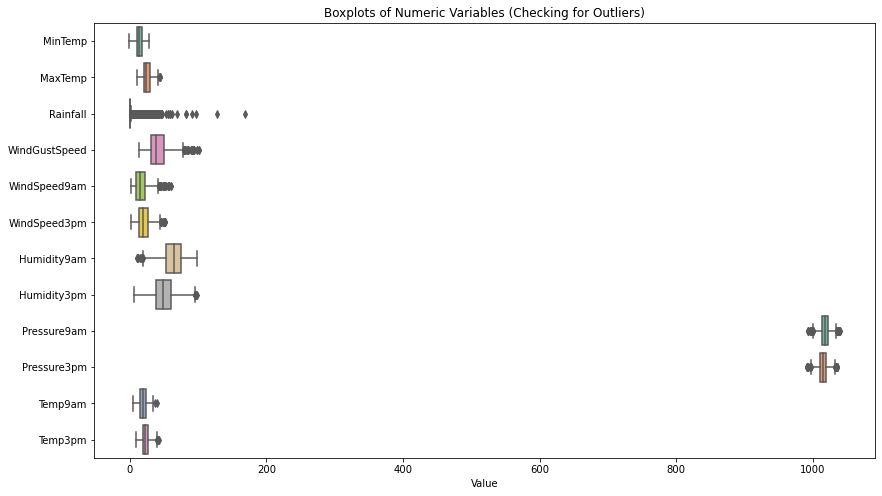

In [35]:
#checking for outliers
numeric_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numeric_vars], orient='h', palette='Set2')
plt.title('Boxplots of Numeric Variables (Checking for Outliers)')
plt.xlabel('Value')
plt.show()

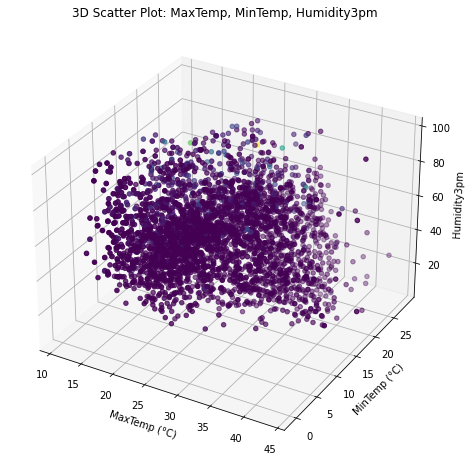

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MaxTemp'], df['MinTemp'], df['Humidity3pm'], c=df['Rainfall'], cmap='viridis')
ax.set_xlabel('MaxTemp (°C)')
ax.set_ylabel('MinTemp (°C)')
ax.set_zlabel('Humidity3pm')
ax.set_title('3D Scatter Plot: MaxTemp, MinTemp, Humidity3pm')
plt.show()

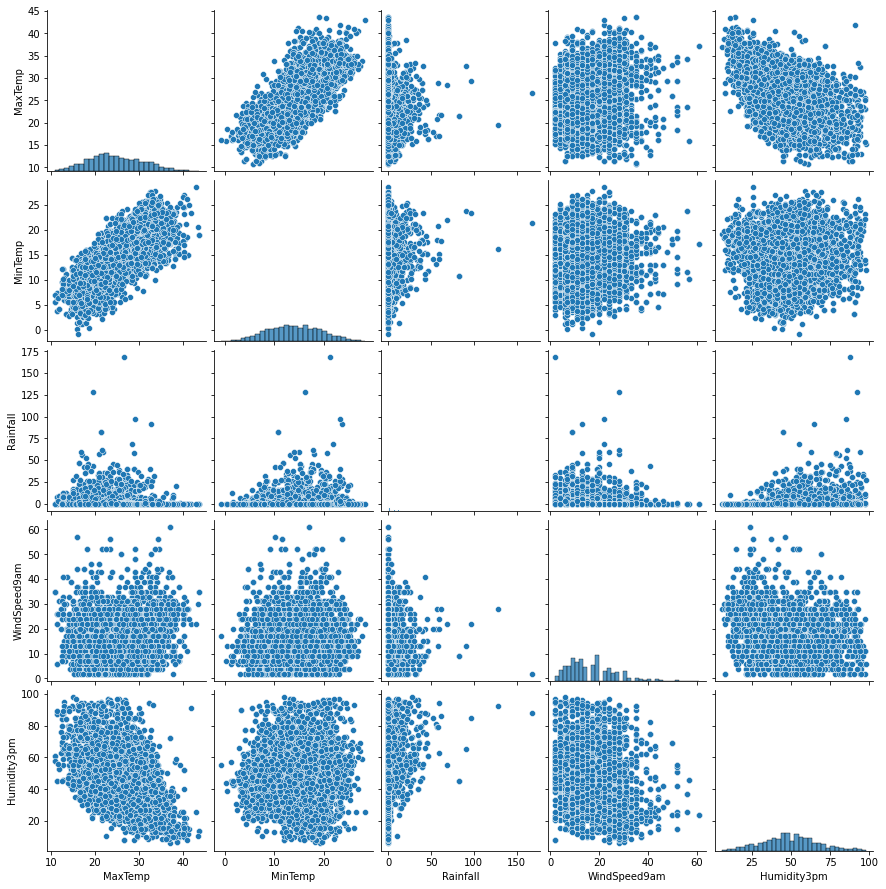

In [37]:
selected_vars = df[['MaxTemp', 'MinTemp', 'Rainfall', 'WindSpeed9am', 'Humidity3pm']]

sns.pairplot(selected_vars)
plt.show()

In [38]:
Q1 = df[numeric_vars].quantile(0.25)
Q3 = df[numeric_vars].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df[numeric_vars] < lower_bound) | (df[numeric_vars] > upper_bound)][numeric_vars]


print("Outlier values for '{}' variable:".format(numeric_vars))
print(outliers)

Outlier values for '['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']' variable:
      MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
907       NaN      NaN      24.4            NaN           NaN           NaN   
908       NaN      NaN       6.8            NaN           NaN           NaN   
909       NaN      NaN      16.8            NaN           NaN           NaN   
910       NaN      NaN       NaN            NaN           NaN           NaN   
911       NaN      NaN       NaN            NaN           NaN           NaN   
...       ...      ...       ...            ...           ...           ...   
8381      NaN      NaN       3.0            NaN           NaN           NaN   
8382      NaN      NaN       NaN            NaN           NaN           NaN   
8383      NaN      NaN      20.4            NaN           NaN           NaN   
8384      NaN

In [39]:
s = (df.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [40]:
t = (df.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [41]:
for i in num_cols:
    print(i, df[i].isnull().sum())

MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0


DATA PREPROCESSING

In [42]:
label_encoder = LabelEncoder()
for i in object_cols:
    df[i] = label_encoder.fit_transform(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3790 entries, 907 to 8385
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3790 non-null   datetime64[ns]
 1   Location       3790 non-null   int32         
 2   MinTemp        3790 non-null   float64       
 3   MaxTemp        3790 non-null   float64       
 4   Rainfall       3790 non-null   float64       
 5   Evaporation    3790 non-null   float64       
 6   Sunshine       3790 non-null   float64       
 7   WindGustDir    3790 non-null   int32         
 8   WindGustSpeed  3790 non-null   float64       
 9   WindDir9am     3790 non-null   int32         
 10  WindDir3pm     3790 non-null   int32         
 11  WindSpeed9am   3790 non-null   float64       
 12  WindSpeed3pm   3790 non-null   float64       
 13  Humidity9am    3790 non-null   float64       
 14  Humidity3pm    3790 non-null   float64       
 15  Pressure9am    3790

In [43]:
from sklearn import preprocessing
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm']

numerical_features = df[numerical_columns]

col_names = list(numerical_features.columns)
s_scaler = preprocessing.StandardScaler()
numerical_features = s_scaler.fit_transform(numerical_features)
numerical_features = pd.DataFrame(numerical_features, columns=col_names)

numerical_features_stats = numerical_features.describe().T

print(numerical_features_stats)

                count          mean       std       min       25%       50%  \
MinTemp        3790.0  1.061596e-16  1.000132 -2.862328 -0.750127 -0.013764   
MaxTemp        3790.0  1.181699e-16  1.000132 -2.296389 -0.730686 -0.104405   
Rainfall       3790.0  1.118454e-15  1.000132 -0.315502 -0.315502 -0.315502   
Evaporation    3790.0  3.293869e-16  1.000132 -1.453250 -0.684412 -0.190159   
Sunshine       3790.0  5.130021e-17  1.000132 -2.057743 -0.695128  0.274424   
WindGustSpeed  3790.0 -1.552481e-16  1.000132 -2.035505 -0.736429 -0.159062   
WindSpeed9am   3790.0  2.329564e-16  1.000132 -1.511030 -0.775369 -0.144803   
WindSpeed3pm   3790.0  1.189608e-16  1.000132 -2.075903 -0.814249 -0.011379   
Humidity9am    3790.0 -7.980332e-16  1.000132 -3.237827 -0.656594  0.019443   
Humidity3pm    3790.0  1.959734e-16  1.000132 -2.457952 -0.647123 -0.024651   
Pressure9am    3790.0 -1.166809e-14  1.000132 -3.748259 -0.668924 -0.013422   
Pressure3pm    3790.0  1.228862e-14  1.000132 -3.737

In [44]:
#Dropping outliers 
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm']

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)

df_cleaned = df[~outlier_mask]

print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (3790, 23)
Cleaned shape: (2850, 23)


In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Location'] = label_encoder.fit_transform(df['Location'])
df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])

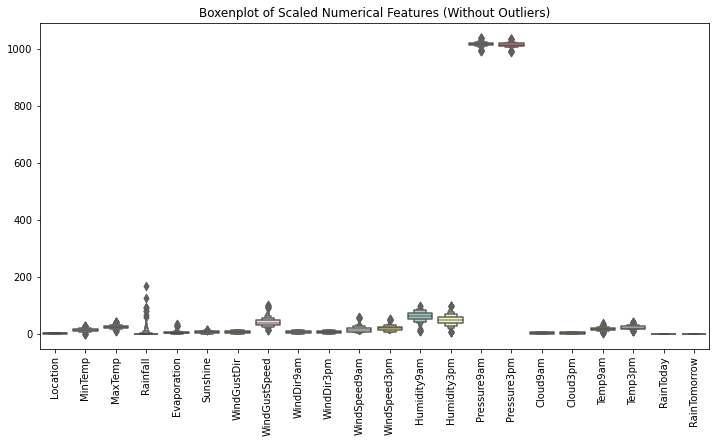

In [46]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, palette="Set3")
plt.title("Boxenplot of Scaled Numerical Features (Without Outliers)")
plt.xticks(rotation=90)
plt.show()

In [47]:
df.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
907 2009-03-10         1     19.8     27.1      24.4          8.6       9.0   
908 2009-03-11         1     18.7     25.6       6.8          3.8       3.4   
909 2009-03-12         1     16.5     25.5      16.8          2.8       6.1   
910 2009-03-13         1     18.5     26.9       0.0          3.2      11.0   
911 2009-03-14         1     18.2     28.2       0.0          6.8       9.0   

     WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
907            2           35.0          12  ...         83.0         60.0   
908            0           33.0          12  ...         85.0         90.0   
909           15           19.0          15  ...         84.0         65.0   
910            1           30.0          12  ...         68.0         60.0   
911            5           50.0           6  ...         67.0         68.0   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
907       1018.9       1017.9       6.0       6.0     22.0     26.0   
908       1020.7       1020.1       4.0       7.0     21.0     20.9   
909       1021.5       1020.1       5.0       7.0     21.0     24.5   
910       1018.9       1016.6       2.0       5.0     23.3     26.4   
911       1016.3       1012.8       1.0       1.0     24.0     25.9   

     RainToday  RainTomorrow  
907          1             1  
908          1             1  
909          1             0  
910          0             0  
911          0             1  

[5 rows x 23 columns]

In [48]:
correlation = df.corr()
correlation

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000 -0.105139  0.040452 -0.057983     0.229907  0.053642   
MinTemp       -0.105139  1.000000  0.740095  0.071315     0.498337  0.080572   
MaxTemp        0.040452  0.740095  1.000000 -0.120673     0.595026  0.517246   
Rainfall      -0.057983  0.071315 -0.120673  1.000000    -0.064387 -0.237101   
Evaporation    0.229907  0.498337  0.595026 -0.064387     1.000000  0.348017   
Sunshine       0.053642  0.080572  0.517246 -0.237101     0.348017  1.000000   
WindGustDir    0.007825 -0.195861 -0.308394  0.108397    -0.166428 -0.140928   
WindGustSpeed  0.390821  0.135500  0.122229  0.073402     0.258328 -0.013350   
WindDir9am    -0.337265 -0.110994 -0.301630  0.131331    -0.144382 -0.106848   
WindDir3pm     0.205982 -0.136629 -0.171932  0.064068    -0.074433 -0.079320   
WindSpeed9am   0.337913  0.067415  0.059749  0.001508     0.213671 -0.019337   
WindSpeed3pm   0.360902  0.092084  0.051563  0.016936     0.180236  0.042117   
Humidity9am   -0.098033 -0.078824 -0.416987  0.304251    -0.399978 -0.510185   
Humidity3pm   -0.231376  0.044881 -0.426143  0.267475    -0.316077 -0.622432   
Pressure9am   -0.047894 -0.475074 -0.354381 -0.120569    -0.277451  0.019715   
Pressure3pm   -0.012500 -0.485264 -0.453176 -0.067936    -0.298626 -0.057406   
Cloud9am       0.040150  0.124513 -0.311638  0.221206    -0.141269 -0.701603   
Cloud3pm       0.007573  0.038071 -0.309302  0.191268    -0.190743 -0.720530   
Temp9am       -0.100164  0.861185  0.890487 -0.050368     0.567189  0.348258   
Temp3pm        0.039780  0.713084  0.977768 -0.126175     0.581462  0.541263   
RainToday     -0.031628 -0.005773 -0.286305  0.558509    -0.206677 -0.336214   
RainTomorrow  -0.020422  0.056973 -0.196455  0.284318    -0.110534 -0.481861   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location          0.007825       0.390821   -0.337265    0.205982  ...   
MinTemp          -0.195861       0.135500   -0.110994   -0.136629  ...   
MaxTemp          -0.308394       0.122229   -0.301630   -0.171932  ...   
Rainfall          0.108397       0.073402    0.131331    0.064068  ...   
Evaporation      -0.166428       0.258328   -0.144382   -0.074433  ...   
Sunshine         -0.140928      -0.013350   -0.106848   -0.079320  ...   
WindGustDir       1.000000      -0.070092    0.465693    0.565552  ...   
WindGustSpeed    -0.070092       1.000000   -0.256343    0.038301  ...   
WindDir9am        0.465693      -0.256343    1.000000    0.250448  ...   
WindDir3pm        0.565552       0.038301    0.250448    1.000000  ...   
WindSpeed9am     -0.138225       0.695486   -0.256086   -0.025626  ...   
WindSpeed3pm      0.069454       0.704099   -0.139576    0.086499  ...   
Humidity9am       0.150147      -0.246922    0.186306    0.023649  ...   
Humidity3pm       0.186878      -0.146193    0.253557    0.039202  ...   
Pressure9am      -0.100622      -0.359885    0.025185   -0.143845  ...   
Pressure3pm       0.008982      -0.328083    0.122167   -0.042418  ...   
Cloud9am          0.141223       0.054118    0.130006    0.106336  ...   
Cloud3pm          0.112562       0.124275    0.063649    0.071961  ...   
Temp9am          -0.220771       0.094809   -0.183475   -0.147086  ...   
Temp3pm          -0.327850       0.084074   -0.308404   -0.191359  ...   
RainToday         0.207177       0.072295    0.216458    0.141682  ...   
RainTomorrow      0.087582       0.220913    0.051553    0.042865  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Location         -0.098033    -0.231376    -0.047894    -0.012500  0.040150   
MinTemp          -0.078824     0.044881    -0.475074    -0.485264  0.124513   
MaxTemp          -0.416987    -0.426143    -0.354381    -0.453176 -0.311638   
Rainfall          0.304251     0.267475    -0.120569    -0.067936  0.221206   
Evaporation      -0.399978    -0.316077    -0.277451    -0.298626 -0.141269 

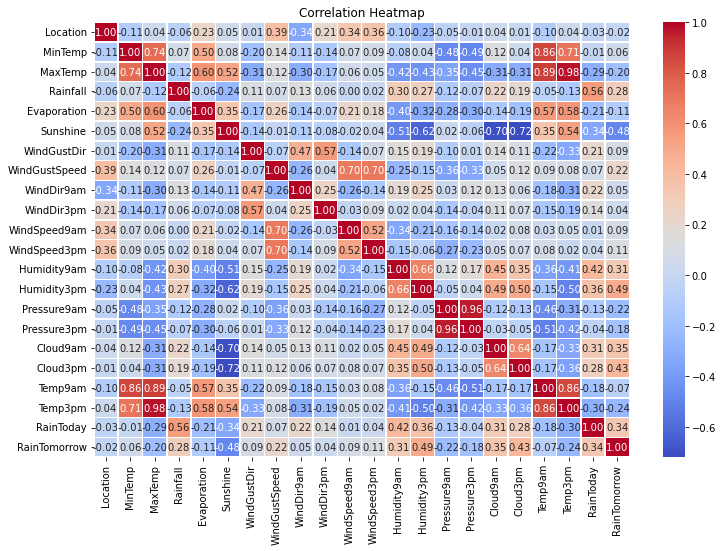

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Model Building

In [50]:
# Dropping target and non-predictive columns
X_classification = df.drop(['RainTomorrow', 'Date'], axis=1)
y_classification = df['RainTomorrow']

In [51]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

In [52]:
#predicting whether or not it will rain tomorrow.
from sklearn.metrics import accuracy_score, classification_report
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train_classification, y_train_classification)

y_pred_classification = clf.predict(X_test_classification)


accuracy = accuracy_score(y_test_classification, y_pred_classification)
classification_report_result = classification_report(y_test_classification, y_pred_classification)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.8970976253298153
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       580
           1       0.84      0.70      0.76       178

    accuracy                           0.90       758
   macro avg       0.87      0.83      0.85       758
weighted avg       0.89      0.90      0.89       758



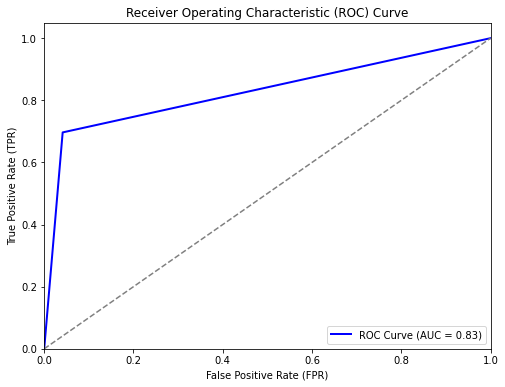

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test_classification, y_pred_classification)

fpr, tpr, thresholds = roc_curve(y_test_classification, y_pred_classification)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [54]:
#predicting how much rainfall could be there
X_regression = df.drop(['Rainfall', 'Date'], axis=1)
y_regression = df['Rainfall']

In [55]:
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regressor = LinearRegression()

regressor.fit(X_train_regression, y_train_regression)

y_pred_regression = regressor.predict(X_test_regression)

mse = mean_squared_error(y_test_regression, y_pred_regression)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_regression, y_pred_regression)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 5.616236846750294
R-squared (R2): 0.3752246517235601


In [57]:
new_features = [13.4, 22.9, 0.6, 0, 1, 44.0, 0, 1, 1, 0, 1, 0, 71, 22, 1007.7, 1007.1, 8, 0, 16.9, 21.8,0]
predicted_rainfall = regressor.predict([new_features])
# Print the predicted rainfall amount
print(f"Predicted Rainfall Amount: {predicted_rainfall[0]} mm")

Predicted Rainfall Amount: 409.2069171512316 mm
